# Multiple Linear Regression Assignment

### Dataset: Toyota Corolla

This notebook contains the complete assignment solution for performing **Multiple Linear Regression (MLR)** on the Toyota Corolla dataset.

## Task 1: Exploratory Data Analysis (EDA)
We begin by exploring the dataset, checking for missing values, summary statistics, and visualizations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

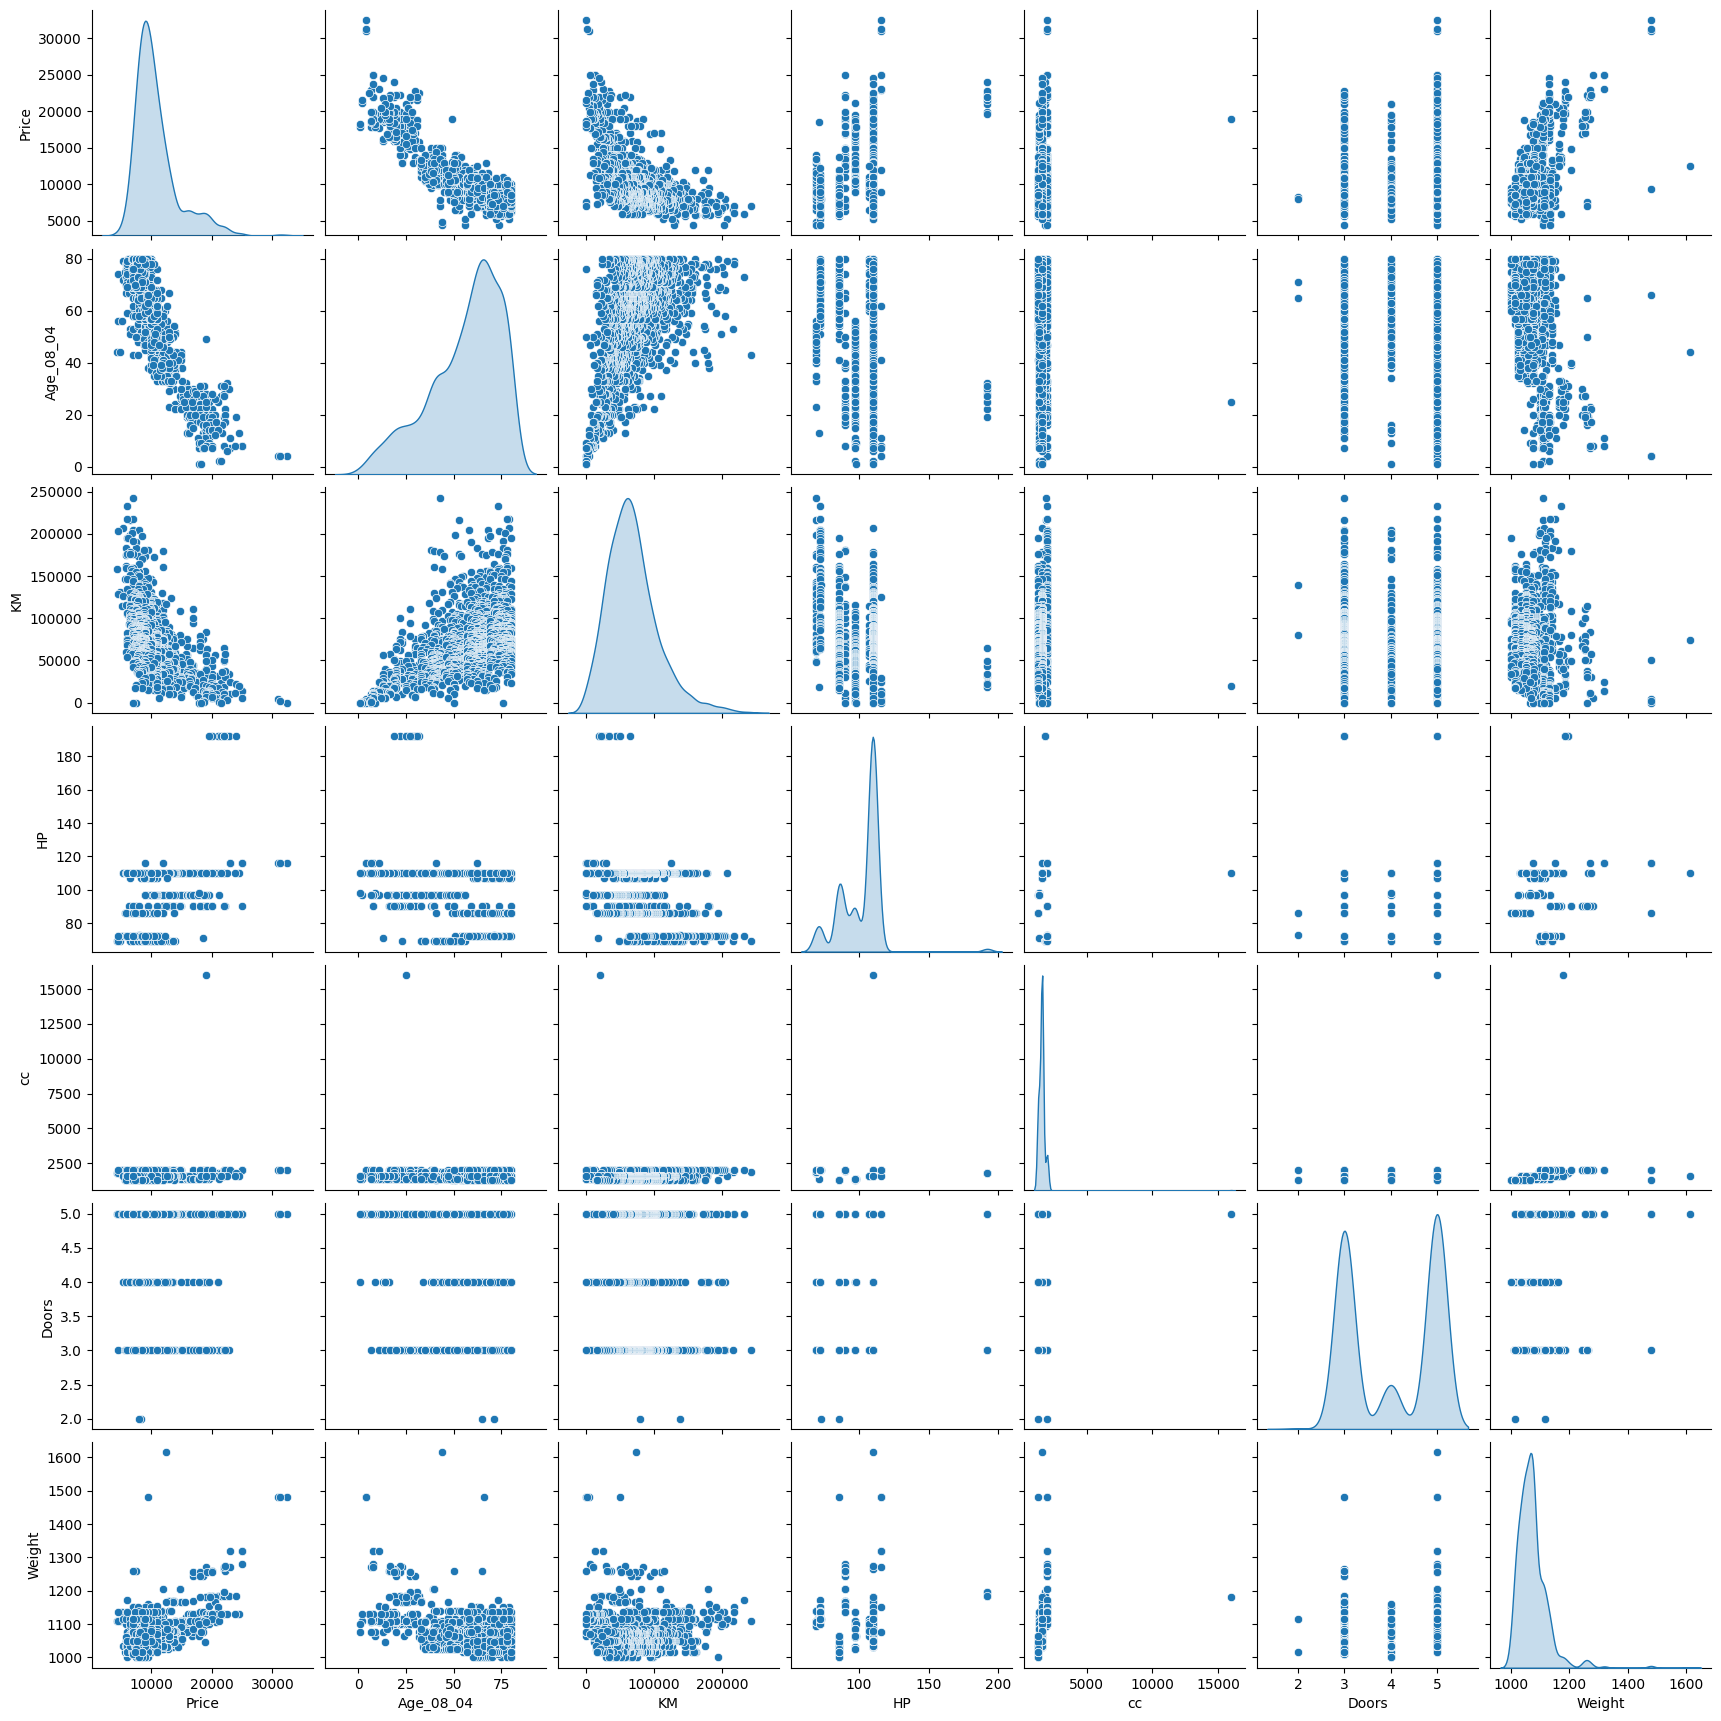

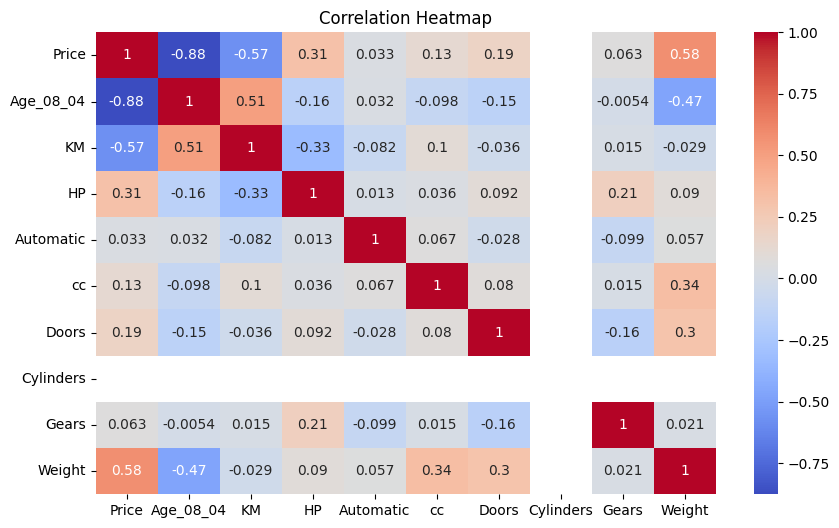

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")

# Display dataset info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Pairplot for numerical variables
sns.pairplot(df[['Price','Age_08_04','KM','HP','cc','Doors','Weight']], diag_kind='kde')
plt.show()

# Correlation heatmap - calculate correlation only for numerical columns
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Task 2: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Convert categorical variable 'Fuel_Type' using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Define features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (1148, 11) Test shape: (288, 11)


## Task 3: Build Multiple Linear Regression Models

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)
print("Model 1 Coefficients:", model1.coef_)

# Model 2: Statsmodels summary for detailed coefficients
X_train_const = sm.add_constant(X_train)
# Convert boolean columns to integers for statsmodels
X_train_const = X_train_const.astype(float)
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

# Model 3: Feature selection using high correlation features
features = ['Age_08_04','KM','HP','Weight']
X_train_fs = X_train[features]
X_test_fs = X_test[features]

model3 = LinearRegression()
model3.fit(X_train_fs, y_train)

print("Model 3 Coefficients:", model3.coef_)

Model 1 Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01 -1.62003744e-12  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Mon, 18 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:20:11   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
        

## Task 4: Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Evaluate model 1
y_pred1 = model1.predict(X_test)
print("Model 1 R2:", r2_score(y_test, y_pred1))
print("Model 1 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))

# Evaluate model 3
y_pred3 = model3.predict(X_test_fs)
print("Model 3 R2:", r2_score(y_test, y_pred3))
print("Model 3 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred3)))

Model 1 R2: 0.8348888040611082
Model 1 RMSE: 1484.2654153296514
Model 3 R2: 0.8506068681500583
Model 3 RMSE: 1411.85020911323


## Task 5: Apply Lasso and Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge R2:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso R2:", r2_score(y_test, y_pred_lasso))

Ridge R2: 0.8351359377712336
Lasso R2: 0.8349467801805


# Interview Questions
## 1. What is Normalization & Standardization and how is it helpful?

Ans: **Normalization**:

Normalization rescales the feature values to a fixed range, typically [0, 1].

Example formula:

X Normalization=X-Xmin/Xmax-Xmin


It is useful when features have different scales and you want them all in the same range.

Common for algorithms that compute distances (e.g., KNN, Neural Networks).


**Standardization**:

Standardization rescales data to have a mean of 0 and standard deviation of 1.

Example formula:

𝑋 Standadization=X-mu/Std.
	​


where μ = mean, σ = standard deviation.

Useful when features have different scales and you want them centered around 0.

Helps models like Linear Regression, Logistic Regression, SVM to converge faster and perform better.

## 2. What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity:

Occurs when two or more predictor variables are highly correlated.

Leads to unstable estimates of coefficients and large standard errors.

Techniques to Address Multicollinearity:

Variance Inflation Factor (VIF):

Calculate VIF for each predictor.

Remove predictors with high VIF (usually >10).

Remove Highly Correlated Features:

Calculate pairwise correlations.

Drop one of each pair of highly correlated variables (e.g., correlation > 0.8).

Principal Component Analysis (PCA):

Transform original correlated features into orthogonal principal components.

Regularization (Lasso/Ridge Regression):

Ridge Regression (L2): Shrinks coefficients to reduce impact of multicollinearity.

Lasso Regression (L1): Can zero out some coefficients, effectively selecting features.

Domain Knowledge:

Remove variables that are redundant by business logic.